## Projet IML - Samuel M. / David X. / Tom P.

# Sommaire :

0- Imports

1- Création d’une réponse type (Bon format)

2- Création d'un premier classifier

3- 

_______
_______

## 0 - Imports

Importation des bibliotheques necessaires

In [22]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

On recupere les fonctions <u>donnees dans l'ennonce</u>

In [23]:
def eval_performance_raw(predictions: np.array, targets: np.array):
    """Evalue la performance de l'algorithme de classification.

    Args:
        predictions (np.array): prédictions
        targets (np.array): valeurs attendues (vérité terrain)
    """
    # Check we have the right shape and dtype
    if predictions.shape != (349, 1905):
        raise ValueError("Les prédictions doivent être de shape (349, 1905)")
    if predictions.dtype != np.uint8:
        raise ValueError("Les prédictions doivent être de dtype uint8")
    if targets.shape != (349, 1905):
        raise ValueError("Les cibles doivent être de shape (349, 1905)")
    if targets.dtype != np.uint8:
        raise ValueError("Les cibles doivent être de dtype uint8")
    # Check predictions are in the correct domain
    if np.any(predictions > 15):
        raise ValueError("Les prédictions doivent être dans l'intervalle [0, 15]")
    if np.any(targets > 15):
        raise ValueError("Les cibles doivent être dans l'intervalle [0, 15]")
    # Compute the confusion matrix
    confusion_matrix = np.zeros((16, 16), dtype=np.int32)
    for i in range(16):
        for j in range(16):
            confusion_matrix[i, j] = np.sum((predictions == i) & (targets == j))
    # Compute the overall accuracy
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
    # Compute the class-wise accuracy
    class_accuracy = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    # Accuracy ignoring the unclassified pixels in the ground truth
    mask = targets != 0
    accuracy_no_unclassified = np.sum(predictions[mask] == targets[mask]) / np.sum(mask)
    # Return the results
    return accuracy, class_accuracy, accuracy_no_unclassified, confusion_matrix

def load_eval_perf(filename: str, targets: np.array):
    """
    Charge les prédictions depuis un fichier NPZ et évalue la performance de l'algorithme de classification.

    Args:
        filename (str): nom du fichier NPZ contenant les prédictions
        targets (np.array): valeurs attendues (vérité terrain)
    """
    # Load the predictions
    predictions = np.load(filename)['predictions']
    # Evaluate the performance
    return eval_performance_raw(predictions, targets)

def export_predictions(predictions: np.array, filename: str):
    """
    Exporte les prédictions dans un fichier NPZ.
    :param predictions: np.array de shape (349, 1905) et de dtype uint8 contenant les prédictions
    :param filename: nom du fichier de sortie
    """
    # Check we have the right shape and dtype
    if predictions.shape != (349, 1905):
        raise ValueError("Les prédictions doivent être de shape (349, 1905)")
    if predictions.dtype != np.uint8:
        raise ValueError("Les prédictions doivent être de dtype uint8")
    # Check predictions are in the correct domain
    if np.any(predictions > 15):
        raise ValueError("Les prédictions doivent être dans l'intervalle [0, 15]")
    # Ensure the output file has the right extension
    if not filename.endswith('.npz'):
        filename += '.npz'
    # Save the predictions
    np.savez_compressed(filename, predictions=predictions)
    # Remind students to submit the file
    print(f"Prédictions exportées dans {filename}, n'oubliez pas d'envoyer votre fichier !")   

_______
_______

## 1 - Création d’une réponse type (Bon format)

Ici, on crée une réponse type qui doit répondre à ces caractéristiques :

* <u>Matrice 349x1905 :</u> Dimensions de l’image
* <u>Valeurs [0, 15] :</u> Chaque valeur est associée à une classe

Le but est juste de vérifier qu’on peut tester notre réponse avec le vérificateur donné.

_______

_➜ On cree une "prediction" avec des valeurs completement aleatoires_

In [26]:
random_prediction = np.zeros((349, 1905))
for i in range(len(random_prediction)):
    for j in range(len(random_prediction[i])):
        random_prediction[i][j] = i % 15
random_prediction = random_prediction.astype(np.uint8)

_➜ On teste notre "prediction" aleatoire_

Prédictions exportées dans prediction.npz, n'oubliez pas d'envoyer votre fichier !
Function: 	Mean accuracy (micro, no background): 0.07
Class: 		Mean accuracy (macro, no background): nan


/tmp/ipykernel_5876/2048852247.py:30: RuntimeWarning: invalid value encountered in divide
  class_accuracy = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)


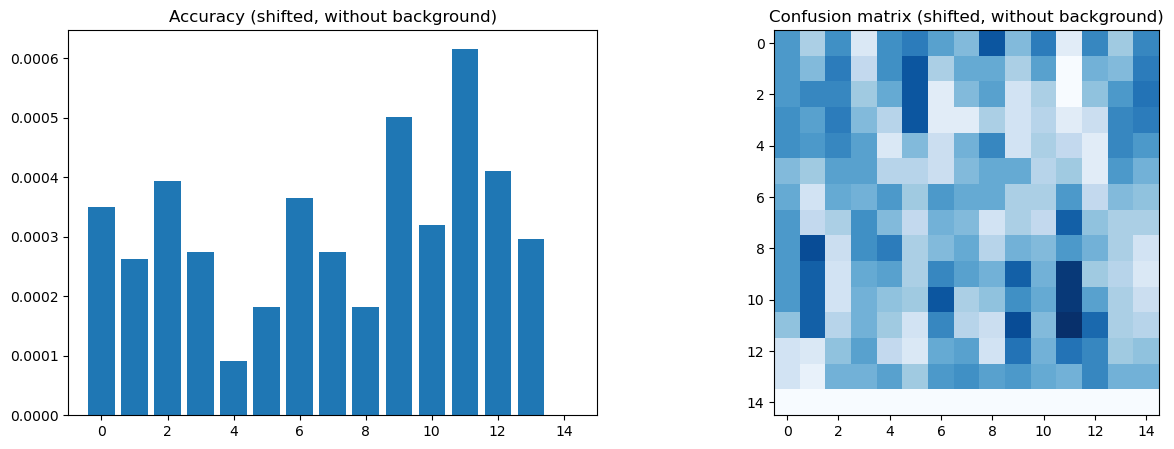

In [30]:
prediction_files = export_predictions(random_prediction, "prediction")
groundtruth = np.load('groundtruth/groundtruth.npy')

accuracy, class_accuracy, accuracy_no_unclassified_micro, confusion_matrix = load_eval_perf("prediction.npz", groundtruth)
print(f"Function: \tMean accuracy (micro, no background): {accuracy_no_unclassified_micro:.2f}")
accuracy_no_unclassified_macro = np.mean(class_accuracy[1:])
print(f"Class: \t\tMean accuracy (macro, no background): {accuracy_no_unclassified_macro:.2f}")

# Affichage de la figure
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Accuracy (shifted, without background)')
plt.bar(range(15), class_accuracy[1:])
plt.xlim(-1, 15)
plt.subplot(122)
plt.title('Confusion matrix (shifted, without background)')
plt.imshow(confusion_matrix[1:,1:], cmap='Blues')
plt.show()

Afin de simplifier le test de notre prediction, on cree une <u>fonction pour tester rapidement</u>

In [32]:
def fast_prediction (prediction):
    prediction_files = export_predictions(prediction, "prediction")
    groundtruth = np.load('groundtruth/groundtruth.npy')

    accuracy, class_accuracy, accuracy_no_unclassified_micro, confusion_matrix = load_eval_perf("prediction.npz", groundtruth)
    print(f"Function: \tMean accuracy (micro, no background): {accuracy_no_unclassified_micro:.2f}")
    accuracy_no_unclassified_macro = np.mean(class_accuracy[1:])
    print(f"Class: \t\tMean accuracy (macro, no background): {accuracy_no_unclassified_macro:.2f}")

    # Affichage de la figure
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title('Accuracy (shifted, without background)')
    plt.bar(range(15), class_accuracy[1:])
    plt.xlim(-1, 15)
    plt.subplot(122)
    plt.title('Confusion matrix (shifted, without background)')
    plt.imshow(confusion_matrix[1:,1:], cmap='Blues')
    plt.show()

________
________

## 2 - Création d'un premier classifier

On cree un premier classifier

_____